In [58]:
# Import dependencies
import os
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

In [59]:
# Load data
## Download here https://www.kaggle.com/datasets/gauthamvijayaraj/spotify-tracks-dataset-updated-every-week
## And put into ../data folder
data = pd.read_csv("../data/spotify_tracks.csv")
complete_X = data[['popularity', 'danceability']]


In [60]:
# X[0] := popularity
# X[1] := danceability

X = complete_X.to_numpy()[:500]
X_popular = X[:,0]
X_dance = X[:,1]

y = np.zeros(shape=X.shape[0])
#y[:int(y.shape[0]/2)] = 1 #, 
y[np.logical_or(X_popular > 50, X_dance > 0.7)] = 1
print(f'Num likes:{int(np.sum(y))} / {y.shape[0]}')


Num likes:195 / 500


In [61]:
# Preprocess data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Split the data
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [62]:
# Train a Support Vector Machine classifier
clf_optimal = SVC(kernel='rbf',  random_state=42)
clf_optimal.fit(X_train, y_train)

SVC(random_state=42)

In [63]:
# Overfit SVM
clf_overfit = SVC(kernel='rbf', C=10000, gamma='scale', random_state=42)
clf_overfit.fit(X_train, y_train)

# Underfit SVM
clf_underfit = SVC(kernel='linear', C=0.01, random_state=42)
clf_underfit.fit(X_train, y_train)

SVC(C=0.01, kernel='linear', random_state=42)

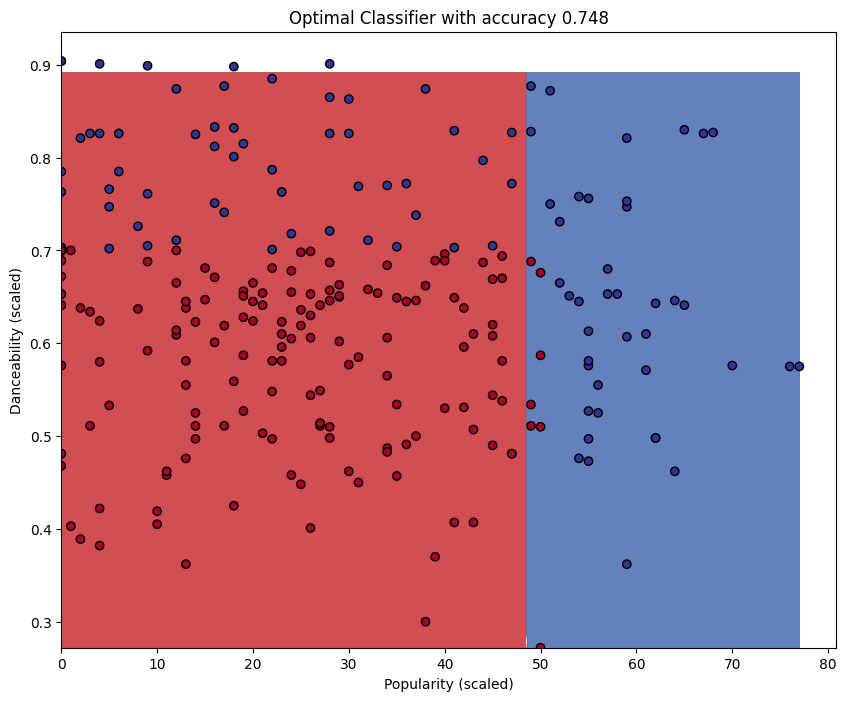

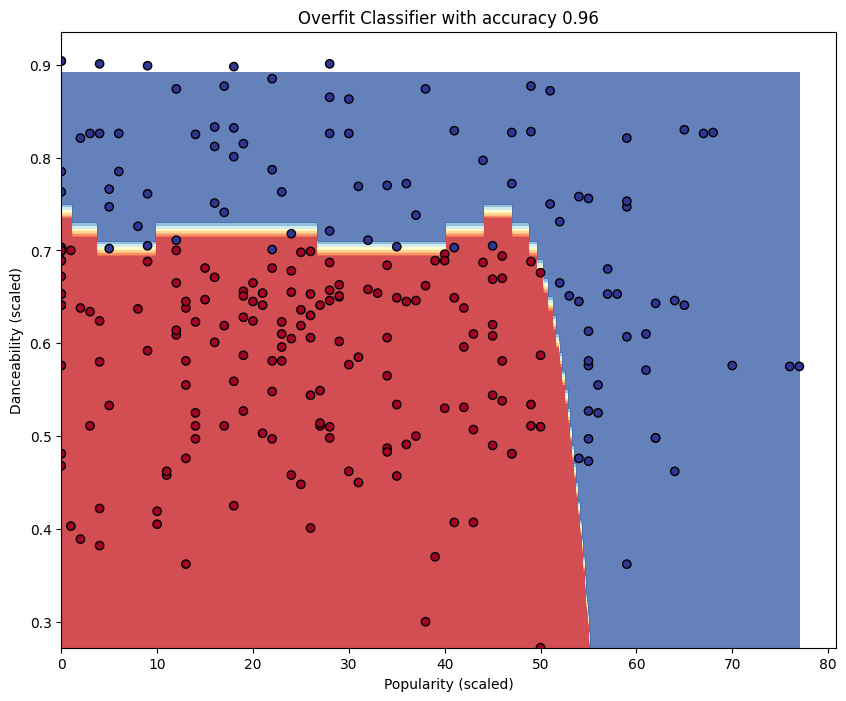

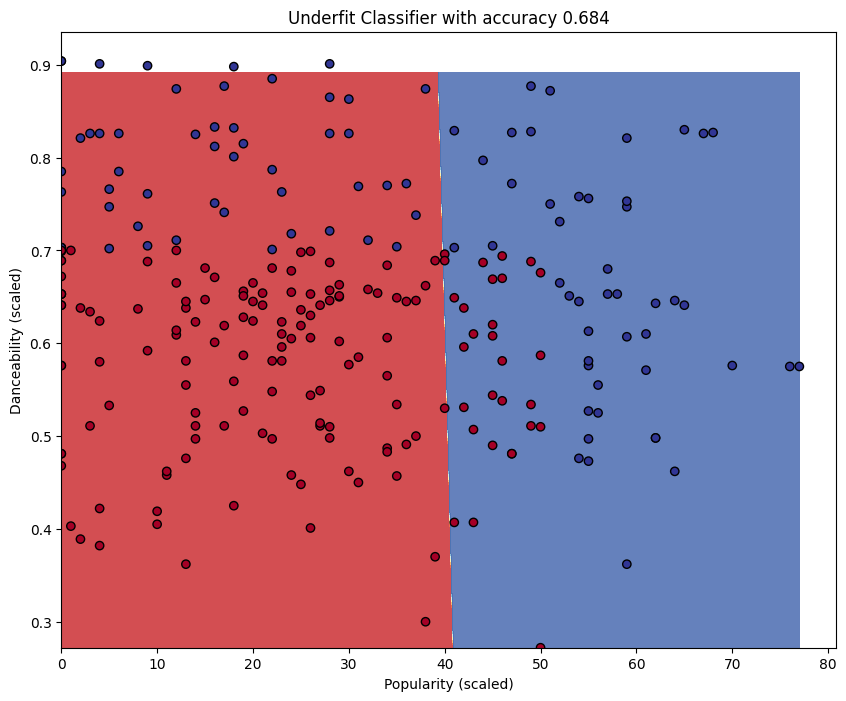

In [64]:
## Plot Prediction

def plot_pred(X, y, classifier, title:str):
    # Create a mesh grid
    # x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    # y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict on the mesh grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    
    # Plot the training points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='black')
    
    plt.xlabel('Popularity (scaled)')
    plt.ylabel('Danceability (scaled)')
    #plt.title('Song Recommendation Decision Boundary')
    plt.title(f'{title} with accuracy {classifier.score(X_test, y_test)}')
    #plt.colorbar()
    plt.show()

plot_pred(X, y, clf_optimal, 'Optimal Classifier')
plot_pred(X, y, clf_overfit, 'Overfit Classifier')
plot_pred(X, y, clf_underfit, 'Underfit Classifier')